<a href="https://colab.research.google.com/github/ChelseaOwiti/Colposcopy-Scan/blob/main/Copy_of_ISP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
import tensorflow
import keras
import os
import glob
from skimage import io
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
dataset_path = '/content/drive/MyDrive/ISProject'
train_classes = ['Type_1', 'Type_2', 'Type_3']

In [50]:
batch_size = 16
IMAGE_SIZE = [224, 224]

In [51]:
train_path = '/content/drive/MyDrive/ISProject/train'
test_path = '/content/drive/MyDrive/ISProject/test'

In [52]:
file_path = os.path.join(train_path, train_classes[2], '*')
file_path = glob.glob(file_path)

In [53]:
#acess some element from the list
print(len(file_path))
image = io.imread(file_path[11])


90


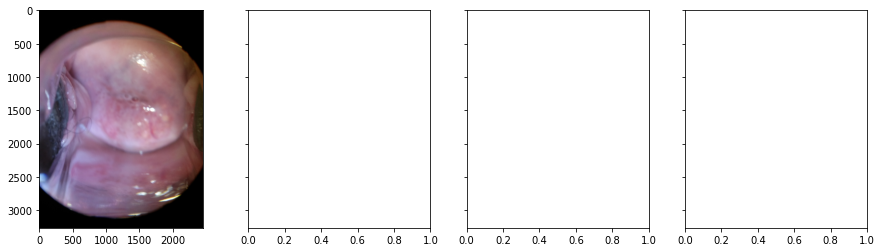

In [54]:
#normalisation
norm1_image = image/255
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
f.set_figwidth(15)
ax1.imshow(norm1_image)




In [67]:
import PIL
from PIL import Image


In [55]:
import cv2
train_df_one = pd.read_csv('/content/drive/MyDrive/ISProject/labels/train/label_type_1.csv')
train_df_two = pd.read_csv('/content/drive/MyDrive/ISProject/labels/train/label_type_2.csv')
train_df_three = pd.read_csv('/content/drive/MyDrive/ISProject/labels/train/label_type_3.csv')
test_pd = pd.read_csv('/content/drive/MyDrive/ISProject/labels/test/solution_stg1_release.csv')

In [56]:
test_pd.head(10)

,image_name,Type_1,Type_2,Type_3
0,0.jpg,0,1,0
1,1.jpg,0,1,0
2,2.jpg,1,0,0
3,3.jpg,0,0,1
4,4.jpg,0,0,1
5,5.jpg,0,1,0
6,6.jpg,0,1,0
7,7.jpg,0,1,0
8,8.jpg,0,1,0
9,9.jpg,0,1,0


In [57]:
from IPython.core.display import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#creating image data generator for train set
image_gen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)


In [58]:
from keras.applications.resnet_v2 import ResNet50V2

In [59]:
model = ResNet50V2(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(200,200, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",)

In [60]:
#

In [ ]:
model.summary()

In [62]:
#f1 measure
from tensorflow.keras import backend as K

def f_1(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [63]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',f_1])

In [ ]:
model.summary()

In [65]:

import tensorflow as tf
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [66]:
first_try = model.fit(file_path, validation_data = None, epochs=2, callbacks=[es])

Epoch 1/2


ValueError: ignored